In [273]:
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request
import matplotlib.pyplot as plt

### Load Dataset

In [274]:
def load_houising_data():
    tarball_path = Path("datasets/housing.tgz")

    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)

        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))


In [275]:
housing = load_houising_data()

In [276]:
housing.head(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [277]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [278]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [279]:
housing[["total_rooms"]].value_counts()

total_rooms
1527.0         18
1582.0         17
1613.0         17
2127.0         16
1722.0         15
               ..
4698.0          1
4690.0          1
4687.0          1
4685.0          1
39320.0         1
Name: count, Length: 5926, dtype: int64

In [280]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


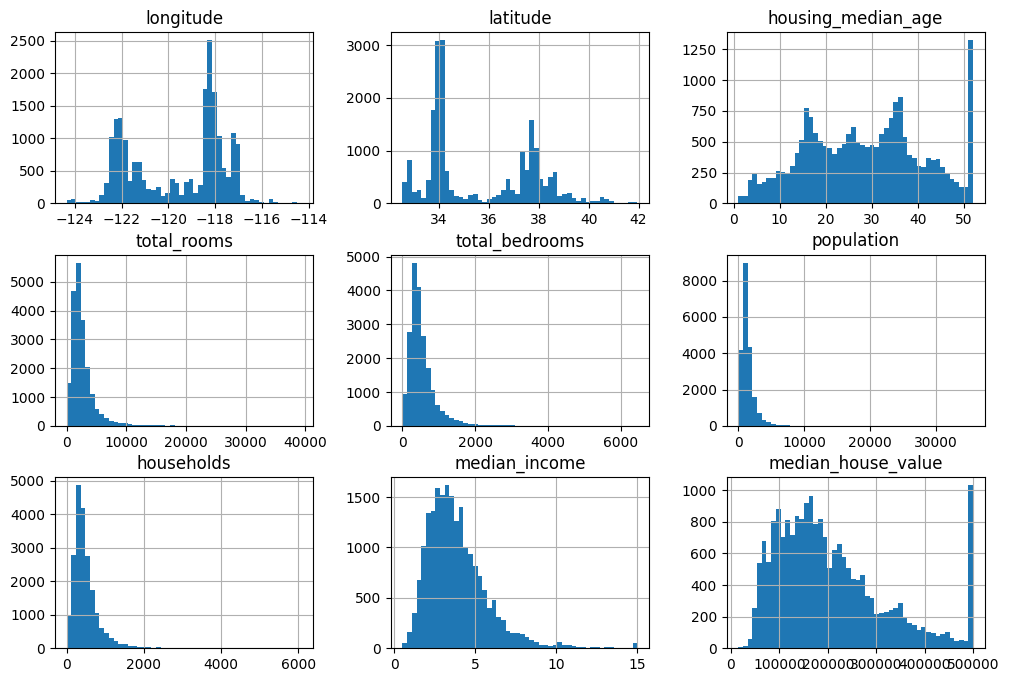

In [281]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

### Train Test Split

In [282]:
def shuffle_and_split_data(data, test_ratio):
    test_ratio = test_ratio/100
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indeces = shuffled_indices[test_set_size:]

    return data.iloc[train_indeces], data.iloc[test_indices]


In [283]:
train_set, test_set = shuffle_and_split_data(housing, 20)

In [284]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13837,-119.80,36.79,45.0,1337.0,187.0,471.0,187.0,5.1870,153800.0,INLAND
10313,-118.47,34.42,25.0,3223.0,524.0,1763.0,508.0,5.2887,183000.0,<1H OCEAN
6906,-121.21,37.50,34.0,294.0,49.0,147.0,47.0,3.0000,162500.0,INLAND
4479,-117.98,33.76,28.0,3215.0,652.0,2066.0,636.0,4.0194,197400.0,<1H OCEAN
2700,-117.52,33.83,22.0,2397.0,400.0,1347.0,403.0,4.4600,189800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
6834,-118.25,34.07,47.0,2059.0,618.0,2033.0,544.0,1.9028,217900.0,<1H OCEAN
14100,-122.46,37.66,15.0,6082.0,1284.0,3861.0,1198.0,5.4221,284700.0,NEAR OCEAN
15189,-118.21,34.05,28.0,1841.0,809.0,3199.0,727.0,1.6319,151600.0,<1H OCEAN
13095,-117.95,33.63,27.0,2489.0,481.0,1082.0,443.0,5.8777,358800.0,<1H OCEAN


In [285]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1139,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
4937,-119.03,35.33,21.0,3057.0,698.0,1627.0,680.0,2.7083,84700.0,INLAND
5158,-117.97,33.87,28.0,1784.0,440.0,1255.0,433.0,3.7054,169200.0,<1H OCEAN
15755,-118.13,33.84,46.0,2439.0,429.0,944.0,374.0,4.2841,312400.0,<1H OCEAN
17074,-121.38,38.61,27.0,2375.0,537.0,863.0,452.0,3.0086,126900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16932,-122.37,40.60,7.0,5178.0,1336.0,2557.0,1283.0,2.4079,111400.0,INLAND
261,-118.00,33.76,12.0,1250.0,331.0,1047.0,334.0,3.0625,208800.0,<1H OCEAN
20316,-117.32,33.51,4.0,966.0,133.0,311.0,92.0,5.2066,500001.0,<1H OCEAN
10583,-118.19,33.77,35.0,1574.0,603.0,820.0,514.0,1.2321,137500.0,NEAR OCEAN


### random seed

In [286]:
from zlib import crc32

In [287]:
"""
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32

def split_data_with_id_hash(data, test_ratio, id_column):
    test_ratio = test_ratio / 100
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
"""

'\ndef is_id_in_test_set(identifier, test_ratio):\n    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32\n\ndef split_data_with_id_hash(data, test_ratio, id_column):\n    test_ratio = test_ratio / 100\n    ids = data[id_column]\n    in_test_set = ids.apply(lambda id_ : is_id_in_test_set(id_, test_ratio))\n    return data.loc[~in_test_set], data.loc[in_test_set]\n'

In [288]:
"""
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
"""

'\nhousing_with_id = housing.reset_index()\ntrain_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")\n'

In [289]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing ,test_size=0.2, random_state=42)

In [290]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,NEAR BAY
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,<1H OCEAN
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,INLAND
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,INLAND


In [291]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0,INLAND
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0,NEAR BAY
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0,INLAND
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,<1H OCEAN


In [292]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])

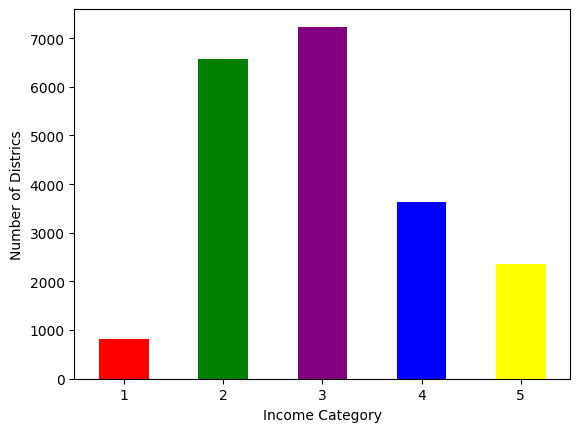

In [293]:
colors = ['red', 'green', 'purple', 'blue', 'yellow']
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, color=colors)
plt.xlabel("Income Category")
plt.ylabel("Number of Districs")
plt.show()

In [294]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splitz = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splitz.append([strat_train_set_n, strat_test_set_n])

In [295]:
strat_train_set, strat_test_set = strat_splitz[0]

In [296]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [297]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [298]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [299]:
housing = strat_train_set.copy()

In [300]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,<1H OCEAN


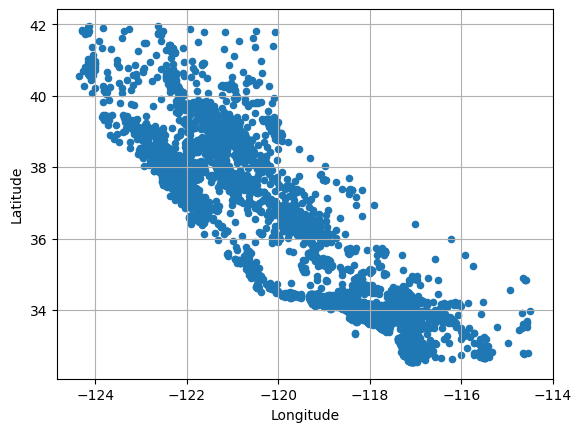

In [301]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

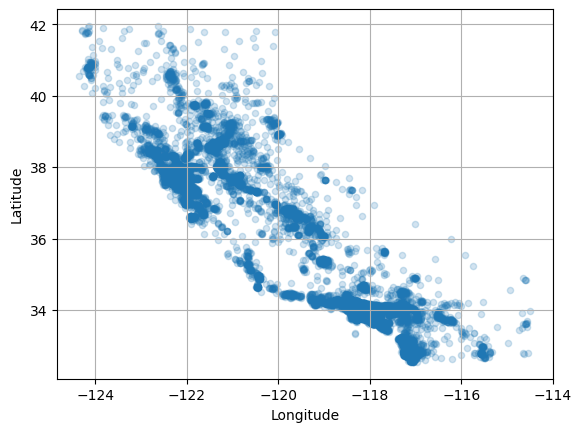

In [302]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

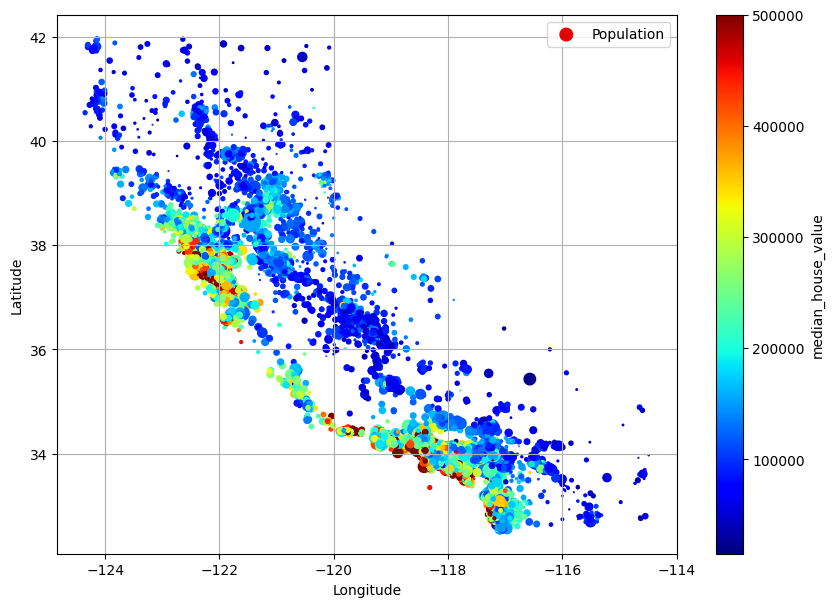

In [303]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, 
            s=housing["population"]/100, label="Population",
            c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [304]:
corr_matrix = housing.select_dtypes(include=["float64", "int64"]).corr()

In [305]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


In [306]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

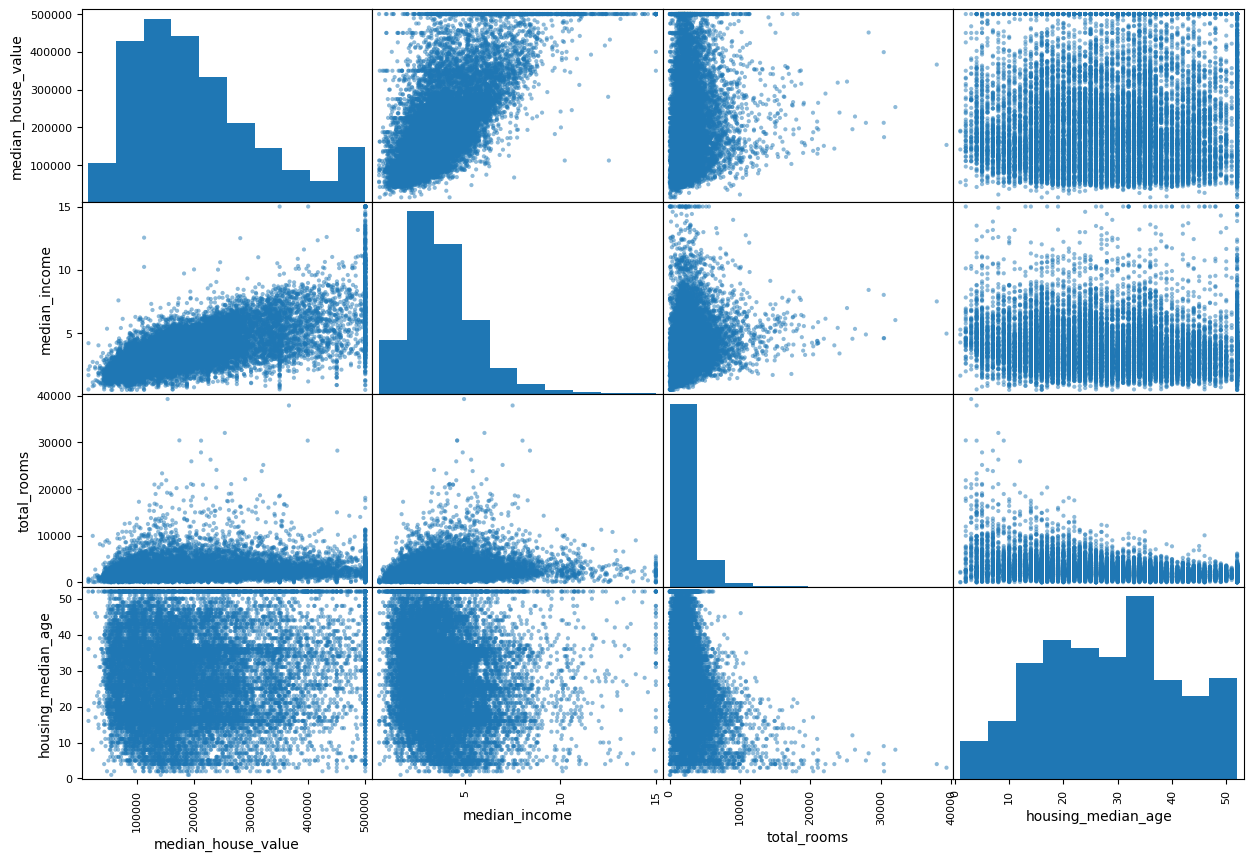

In [307]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(15, 10))

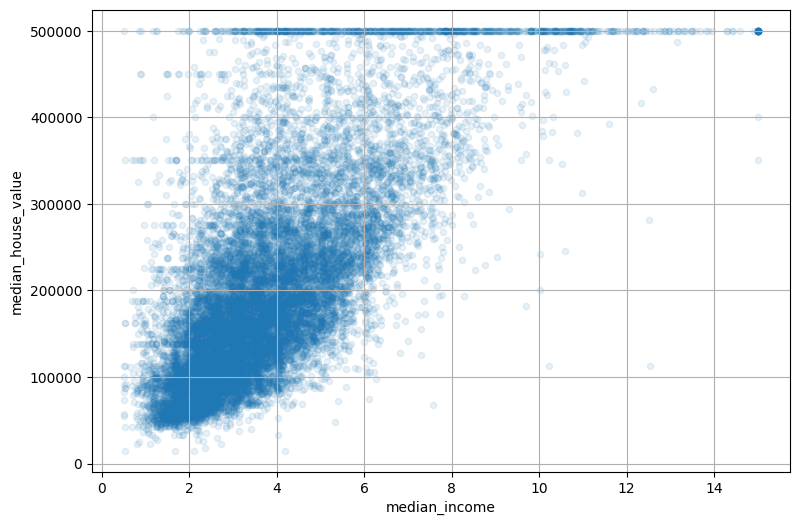

In [308]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True, figsize=(9, 6))
plt.show()

In [309]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [310]:
corr_matrix = housing.select_dtypes(include=["float64", "int64"]).corr()

In [311]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [312]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [313]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [314]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [315]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [316]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [317]:
X = imputer.transform(housing_num)

In [318]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index);

In [319]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [320]:
housing[["ocean_proximity"]]

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


In [321]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]

housing_cat

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


In [322]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [323]:
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [324]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [325]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [326]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [327]:
housing_cat_1hot.toarray()[:10]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [328]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [329]:
df_test = pd.DataFrame({"ocean_proximity":["INLAND", "NEAR BAY"]})

In [330]:
df_test

,ocean_proximity
0,INLAND
1,NEAR BAY


In [331]:
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [332]:
cat_encoder.transform(df_test)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [333]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})

In [334]:
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [335]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [336]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [337]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [340]:
df_output = pd.DataFrame(
    cat_encoder.transform(df_test_unknown).toarray(),
    columns=cat_encoder.get_feature_names_out(),
    index=df_test_unknown.index
)

In [341]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


In [344]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)



In [345]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
housing_num_standard_scaler = standard_scaler.fit_transform(housing_num)

In [346]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [347]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

lr_model = LinearRegression()
lr_model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]

scaled_predictions = lr_model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [348]:
scaled_predictions

array([[-0.64466228],
       [ 0.80674175],
       [-0.52302364],
       [-0.5853166 ],
       [-0.12415952]])

In [349]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [351]:
from sklearn.compose import TransformedTargetRegressor

ttr_model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())

ttr_model.fit(housing[["median_income"]], housing_labels)
predictions = ttr_model.predict(some_new_data)

In [352]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])